# Basic Neural Network

### Import libraries

In [4]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [5]:
# Define size of the training set
observations = 1000

# We define 2 inputs, x and z. We generate them randomly, following an uniform distribution.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# We combine them into a matrix, which will be the x matrix from the linear model y = x*w + b.
inputs = np.column_stack((xs,zs))

# 0Check if the dimensions of the inputs are n x k (number of observations x number of variables)
print (inputs.shape)

(1000, 2)


### Generate the targets we will aim at

In [6]:
# We make up a function, use the ML methodology, and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
targets = 2*xs - 3*zs + 5 + noise

# Check that the shape of the targets is n x m (number of output variables x 1)
print (targets.shape)

(1000, 1)


### Plot training data
The point is to see that there is a strong trend that our model should learn to reproduce.

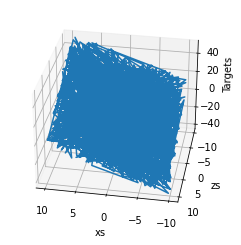

In [7]:
# To use the 3D plot, the objects should have a certain shape
targets = targets.reshape(observations,)

xs = xs.reshape(observations,)
zs = zs.reshape(observations,)

# Declare the figure
fig = plt.figure()

# This method allows us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose axes
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# Set up the azim parameter to plot the data from different angles
ax.view_init(azim=100)

# Show plot 
plt.show()

# Reshape back to the shape before plotting
targets = targets.reshape(observations,1)

xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)

### Initialize variables

In [8]:
# We will initialize the weights and biases randomly in some small initial range.
init_range = 0.1

# Weights are of size k x m (number of input variables x number of output variables)
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[-0.011534 ]
 [-0.0525555]]
[0.0703431]


### Set a learning rate

In [9]:
# Set some small learning rate (eta).
learning_rate = 0.02

### Train the model

In [10]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
for i in range (100):
    
    # Linear model equation: y = xw + b
    outputs = np.dot(inputs,weights) + biases
    # Deltas are the differences between the outputs and the targets
    deltas = outputs - targets
        
    # We are considering the L2-norm loss
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # Print the loss function value at each step so we can observe whether it is decreasing
    print (loss)
    
    # We scale the deltas the same way as the loss function. This way, the learning rate is independent of the number of samples (observations).
    deltas_scaled = deltas / observations
    
    # We apply the gradient descent update rules
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

209.22479248774303
36.94999908183997
14.756563803344456
11.55498248935155
10.773938681971647
10.314603416770696
9.910272617813115
9.52653211870297
9.158474078866671
8.804960757111486
8.465354045970773
8.139098815418913
7.8256691302142665
7.524560669358898
7.235289056887523
6.95738897335688
6.690413393398677
6.433932864864397
6.187534817789438
5.950822900711549
5.723416343103323
5.504949342871098
5.295070477932235
5.093442140923895
4.899739996133891
4.713652457780116
4.534880188799255
4.3631356193385855
4.1981424841762855
4.039635378326165
3.8873593301119955
3.741069391024662
3.600530241702395
3.465515813400286
3.335808924340182
3.2112009303559725
3.0914913892723543
2.976487738477158
2.866004985168584
2.759865408779128
2.6578982750974682
2.559939561628491
2.4658316937496543
2.3754232912392927
2.2885689247691148
2.2051288819692054
2.1249689426892235
2.047960163094288
1.9739786682482394
1.9029054528506553
1.8346261898070684
1.7690310463244496
1.7060145072361679
1.645475205272188
1.5873157

### Print weights and biases and see if we have worked correctly.

In [11]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

# Note that they may be converging. So more iterations are needed.

[[ 1.99500582]
 [-2.99329431]] [4.34066532]


### Plot last outputs vs targets
The last ones at the end of the training represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

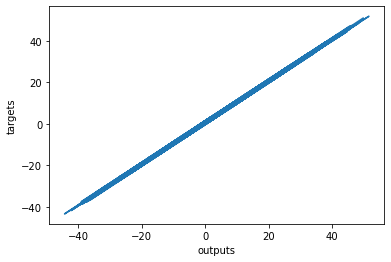

In [12]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()